##**IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # Atur jumlah max kolom yang ditampilkan = tidak terbatas
pd.set_option('display.max_rows', 99) # Atur jumlah max baris yang ditampilkan = 99
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

##**IMPORT DATA**

In [ ]:
!gdown --id 1DfTQHlw9xWb_T0iRDnumm7PH_jEdA2He

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DfTQHlw9xWb_T0iRDnumm7PH_jEdA2He
From (redirected): https://drive.google.com/uc?id=1DfTQHlw9xWb_T0iRDnumm7PH_jEdA2He&confirm=t&uuid=84cb974d-752e-4af7-81ba-c3e35a128e7e
To: /content/loan_data_2007_2014.csv
100% 240M/240M [00:04<00:00, 56.8MB/s]


In [ ]:
# Membaca file csv
# index_col=0 menggunakan nilai di kolom pertama sebagai indeks DataFrame
data = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

<ipython-input-3-181309e3d1b0>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv', index_col=0)


##**EXPLORE DATA**

In [ ]:
# Mengetahui jumlah baris dan kolom
data.shape

(466285, 74)

In [ ]:
# Menampilkan informasi tentang struktur dan karakteristik dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
# Menampilkan satu baris secara acak
data.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
29417,523287,677011,6000,6000,5957.357155,36 months,11.12,196.78,B,B3,ANDERSON AUTOMOTIVE,< 1 year,RENT,42000.0,Source Verified,Jun-10,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/29/10 > I will be payin...,debt_consolidation,BILLS,212xx,MD,4.23,0.0,Feb-00,0.0,76.0,NaN,8.0,0.0,6390,48.8,16.0,f,0.0,0.0,7076.16,7019.16,6000.0,1076.16,0.0,0.0,0.0,Jun-13,247.3,NaN,Jun-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghitung jumlah nilai unik pada id
data.id.nunique()

466285

In [ ]:
# Menghitung jumlah nilai unik pada member_id
data.member_id.nunique()

466285

###Remove Useless Features

In [ ]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'

    # free text
    , 'url'
    , 'desc'

    # all null / constant / others
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'

    # expert judgment
    , 'sub_grade'
]

In [ ]:
# axis = 1 --> menghapus kolom
# axis = 0 --> menghapus baris, default
new_data = data.drop(cols_to_drop, axis=1)

In [ ]:
new_data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
159170,22750,22750,22700.0,36 months,13.11,767.75,B,MOSAIC GOSPEL COMMUNITY,3 years,MORTGAGE,63000.0,Verified,Mar-13,Fully Paid,n,credit_card,Personal Credit,OH,22.80,0.0,Mar-94,1.0,NaN,NaN,15.0,0.0,34914,54.9,49.0,f,0.00,0.00,27193.82997,27134.08,22750.00,4443.83,0.0,0.0,0.0,May-15,5908.66,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,287598.0,63600.0
61194,10000,10000,10000.0,36 months,10.99,327.34,B,Loan Administrator,< 1 year,MORTGAGE,30000.0,Source Verified,Nov-13,Current,n,credit_card,Credit ReFi,TX,13.72,0.0,Jun-99,0.0,60.0,NaN,3.0,0.0,9199,76.7,8.0,w,3410.48,3410.48,8183.50000,8183.50,6589.52,1593.98,0.0,0.0,0.0,Jan-16,327.34,Feb-16,Jan-16,0.0,60.0,1,INDIVIDUAL,0.0,0.0,9199.0,12000.0
176880,14000,14000,14000.0,36 months,14.09,479.10,B,pioneer natrual resource,5 years,MORTGAGE,60000.0,Verified,Jan-13,Fully Paid,n,debt_consolidation,breathing room consoladation,CO,16.78,0.0,Jun-83,2.0,40.0,78.0,21.0,1.0,15631,46.0,45.0,w,0.00,0.00,16612.47283,16612.47,14000.00,2612.47,0.0,0.0,0.0,Oct-14,7039.58,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,23603.0,34000.0
91479,20000,20000,19975.0,60 months,10.64,431.27,B,NaN,10+ years,MORTGAGE,91000.0,Verified,Sep-13,Current,n,debt_consolidation,helpful,PA,18.87,0.0,May-99,2.0,NaN,NaN,9.0,0.0,16244,39.9,31.0,f,12298.79,12283.40,11632.59000,11618.08,7701.21,3931.38,0.0,0.0,0.0,Dec-15,431.27,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,327179.0,40700.0
461691,35000,35000,35000.0,36 months,19.97,1300.20,D,President & CEO,5 years,MORTGAGE,210000.0,Verified,Jan-14,Fully Paid,n,other,Smart Planning Loan,TX,11.58,2.0,May-94,1.0,14.0,60.0,7.0,1.0,35380,78.6,15.0,f,0.00,0.00,38310.90915,38310.91,35000.00,3310.91,0.0,0.0,0.0,Jul-14,31811.36,NaN,Jul-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,224010.0,45000.0


## **DEFINE TARGET VARIABLE / LABELING**

In [ ]:
new_data.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
# Normalisasi --> membandingkan proporsi masing-masing kategori dalam data secara lebih tepat, terlepas dari ukuran total data.
new_data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

In [ ]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status: Charged Off'
    , 'Late (31-120 days)'
]

new_data['status_loan'] = np.where(new_data['loan_status'].isin(bad_status), 1, 0)

In [ ]:
new_data['status_loan'].value_counts()

0    416078
1     50207
Name: status_loan, dtype: int64

In [ ]:
new_data['status_loan'].value_counts(normalize=True)*100

0    89.232551
1    10.767449
Name: status_loan, dtype: float64

In [ ]:
# Hapus kolom loan_status
# Inplace=True --> DataFrame asli akan dimodifikasi secara langsung.
new_data.drop('loan_status', axis=1, inplace=True)

##**CLEANING, PREPROCESSING, FEATURE ENGINEERING**

###emp_length

Mengubah string menjadi float

In [ ]:
new_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
new_data['emp_length_int'] = new_data['emp_length'].str.replace(r'[^0-9]+', '', regex=True)

In [ ]:
new_data['emp_length_int'] = new_data['emp_length_int'].astype(float)

In [ ]:
new_data['emp_length_int']

0         10.0
1          1.0
2         10.0
3         10.0
4          1.0
          ... 
466280     4.0
466281    10.0
466282     7.0
466283     3.0
466284    10.0
Name: emp_length_int, Length: 466285, dtype: float64

In [ ]:
new_data.drop('emp_length', axis=1, inplace=True)

###term

Mengubah string menjadi float

In [ ]:
new_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
new_data['term_int'] = new_data['term'].str.replace(' months', '')

In [ ]:
new_data['term_int'] = new_data['term_int'].astype(float)

In [ ]:
new_data['term_int']

0         36.0
1         60.0
2         36.0
3         36.0
4         60.0
          ... 
466280    60.0
466281    60.0
466282    60.0
466283    36.0
466284    36.0
Name: term_int, Length: 466285, dtype: float64

In [ ]:
new_data.drop('term', axis=1, inplace=True)

###earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut.

In [ ]:
new_data['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
new_data['earliest_cr_line_date'] = pd.to_datetime(new_data['earliest_cr_line'], format='%b-%y')

In [ ]:
new_data['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [ ]:
new_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [ ]:
new_data['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
new_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
new_data[new_data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


Nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Cara mengatasinya degan mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [ ]:
#  loc = mengakses baris-baris yang memenuhi kondisi yang diberikan.
new_data.loc[new_data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = new_data['mths_since_earliest_cr_line'].max()

In [ ]:
new_data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

###issue_d

In [ ]:
new_data['issue_d_date'] = pd.to_datetime(new_data['issue_d'], format='%b-%y')
new_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_data['issue_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
new_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [ ]:
new_data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

###last_pymnt_d

In [ ]:
new_data['last_pymnt_d_date'] = pd.to_datetime(new_data['last_pymnt_d'], format='%b-%y')
new_data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
new_data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [ ]:
new_data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

In [ ]:
new_data['next_pymnt_d_date'] = pd.to_datetime(new_data['next_pymnt_d'], format='%b-%y')
new_data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
new_data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [ ]:
new_data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

In [ ]:
new_data['last_credit_pull_d_date'] = pd.to_datetime(new_data['last_credit_pull_d'], format='%b-%y')
new_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - new_data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [ ]:
new_data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [ ]:
new_data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

##**EXPLORATORY DATA ANALYSIS**

### Correlation Check

<ipython-input-49-8d5910879395>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot=True, fmt='.1f')


<Axes: >

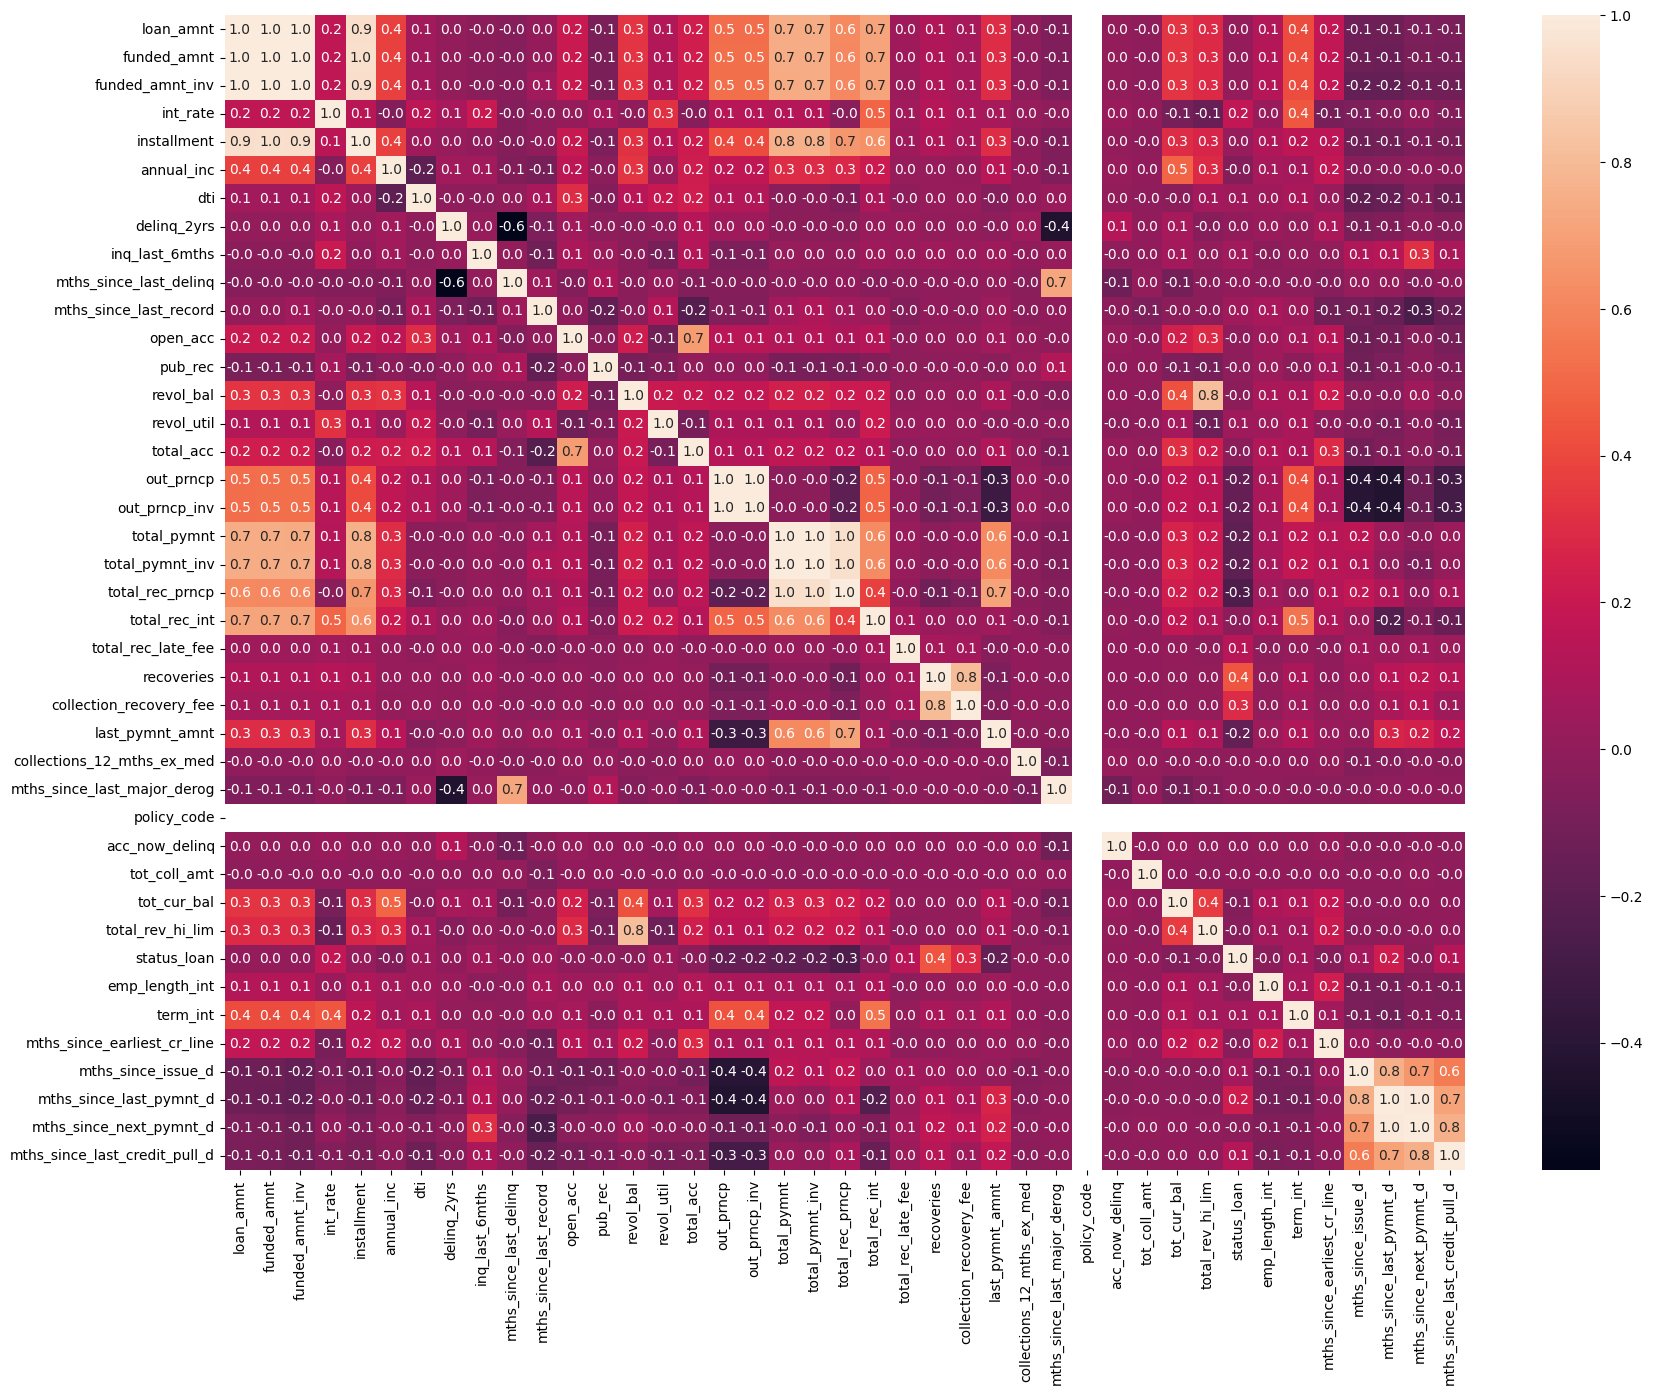

In [ ]:
plt.figure(figsize=(20,15))
# annot=True --> Menampilkan nilai korelasi setiap sel
sns.heatmap(new_data.corr(), annot=True, fmt='.1f')

Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

Mengidentifikasi variabel yang mungkin saling terkait secara kuat dalam analisis data, yang dapat menyebabkan masalah multicollinearity dalam model statistik atau machine learning. **Variabel** dengan **korelasi tinggi** sering kali **tidak memberikan informasi tambahan** yang signifikan dan **dapat dihapus** dari analisis untuk memperbaiki performa model.

In [ ]:
# abs() --> mengembalikan nilai non-negatif dari suatu bilangan. Co = -0.7 --> 0.7
corr_matrix = new_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-50-fb12b68520a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_data.corr().abs()
<ipython-input-50-fb12b68520a9>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Pemilihan segitiga atas dari matriks korelasi biasanya dilakukan karena elemen-elemen di bawah diagonal utama adalah mirror image dari elemen-elemen di atas diagonal utama. Dengan kata lain, korelasi antara variabel A dan B adalah sama dengan korelasi antara variabel B dan A. Oleh karena itu, kita hanya perlu memeriksa setengah matriks korelasi untuk menghindari duplikasi dan menghemat waktu komputasi.

<Axes: >

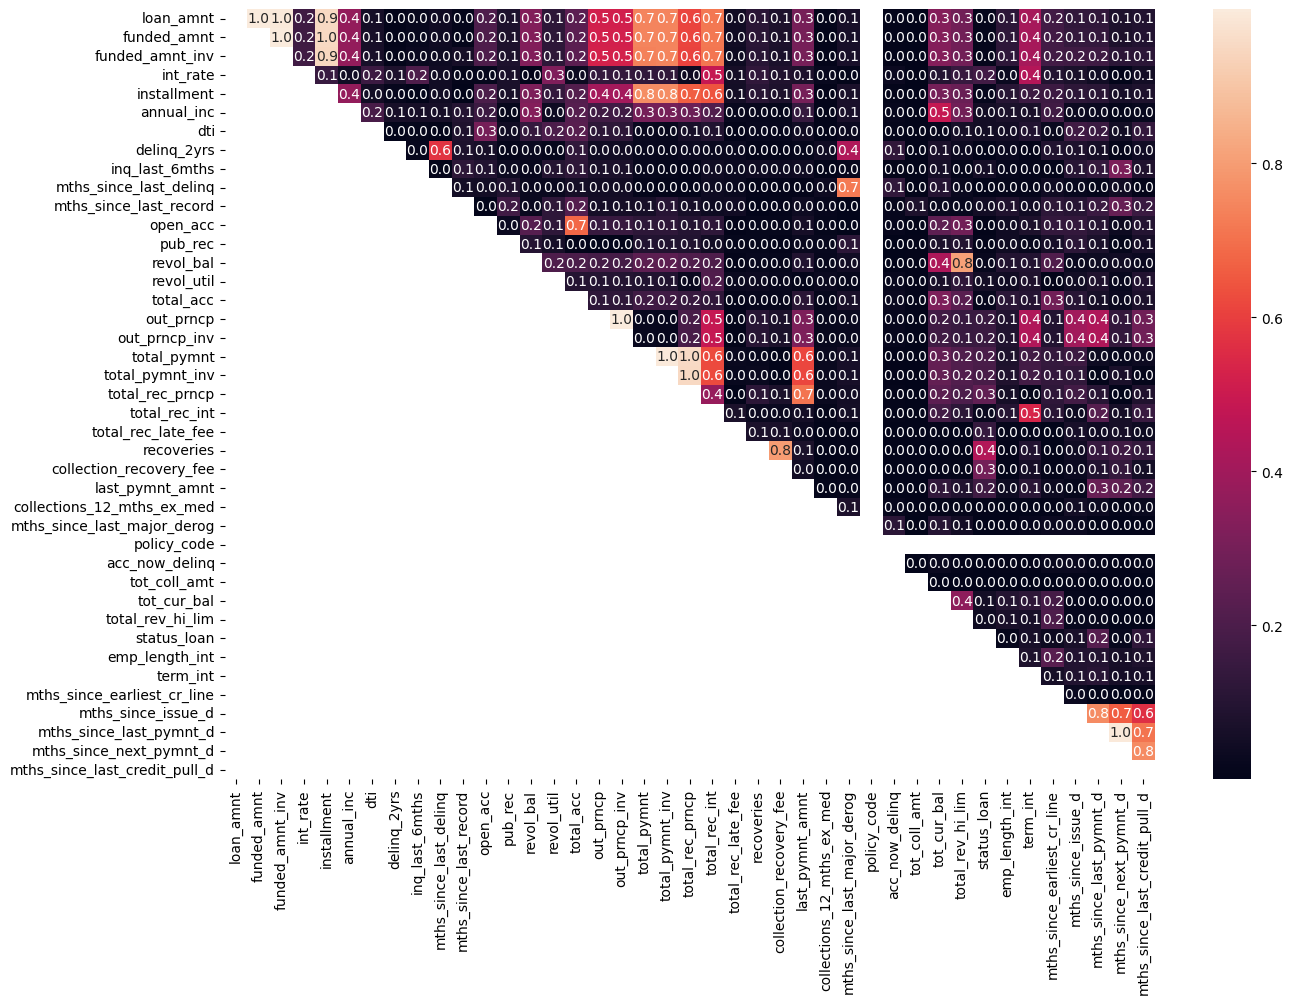

In [ ]:
# Visualisasi heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(upper, annot=True, fmt='.1f')

In [ ]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [ ]:
new_data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [ ]:
# nunique() --> menghitung jumlah nilai unik (distinct) dalam suatu Seri atau DataFrame
new_data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [ ]:
# Menghapus fitur yang memiliki nilai unik tinggi dan hanya memiliki satu nilai unik
new_data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [ ]:
new_data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
status_loan                         2
emp_length_int                     10
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [ ]:
# Menghapus fitur yang hanya memiliki satu nilai unik
new_data.drop(['policy_code'], axis=1, inplace=True)

In [ ]:
for col in new_data.select_dtypes(include='object').columns.tolist():
  print(new_data[col].value_counts(normalize=True)*100)
  print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [ ]:
# Menghapus fitur yang didominasi oleh satu nilai saja
new_data.drop('pymnt_plan', axis=1, inplace=True)

##**MISSING VALUES**

### Missing Value Checking

In [ ]:
check_missing = new_data.isnull().sum()*100 / new_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

In [ ]:
# Menghapus kolom dengan miss value diatas 75%
new_data.drop('mths_since_last_record', axis=1, inplace=True)

### Missing Value Filling

In [ ]:
new_data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
new_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
new_data['acc_now_delinq'].fillna(0, inplace=True)
new_data['total_acc'].fillna(0, inplace=True)
new_data['pub_rec'].fillna(0, inplace=True)
new_data['open_acc'].fillna(0, inplace=True)
new_data['inq_last_6mths'].fillna(0, inplace=True)
new_data['delinq_2yrs'].fillna(0, inplace=True)
new_data['collections_12_mths_ex_med'].fillna(0, inplace=True)
new_data['revol_util'].fillna(0, inplace=True)
new_data['emp_length_int'].fillna(0, inplace=True)
new_data['tot_cur_bal'].fillna(0, inplace=True)
new_data['tot_coll_amt'].fillna(0, inplace=True)
new_data['mths_since_last_delinq'].fillna(-1, inplace=True)

## **FEATURE SCALING AND TRANSFORMATION**

### One Hot Encoding

In [ ]:
categorical_cols = [col for col in new_data.select_dtypes(include='object').columns.tolist()]

In [ ]:
# drop_first=True --> Satu dari kategori dalam variabel kategorikal akan dijatuhkan (dropped), yang berarti satu kategori tidak akan diwakili oleh variabel dummy.
onehot = pd.get_dummies(new_data[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numeric dilakukan proses standarisasi dengan StandardScaler

StandardScaler adalah proses normalisasi data numerik sehingga setiap fitur (kolom) memiliki rata-rata 0 dan variansi 1.

Dengan melakukan standarisasi, kita memastikan bahwa tidak ada satu fitur pun yang mendominasi proses pembelajaran model hanya karena skala yang besar, dan ini dapat membantu meningkatkan kinerja dan stabilitas model.

In [ ]:
numerical_cols = [col for col in new_data.columns.tolist() if col not in categorical_cols + ['status_loan']]

In [ ]:
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(new_data[numerical_cols]), columns=numerical_cols)

In [ ]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,0.238553,1.446626


### Join Transformed Dataframe

In [ ]:
data_model = pd.concat([onehot, std, new_data[['status_loan']]], axis=1)

In [ ]:
data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,status_loan
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,1.764941,1.446626,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,-0.212426,1.446626,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,-0.570896,1.446626,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.151811,-0.616225,0.226989,1.446626,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.316991,1.622784,0.238553,1.446626,0


##**MODELING**

### Train-Test Split

In [ ]:
X = data_model.drop('status_loan', axis=1)
y = data_model['status_loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

<ipython-input-73-b5c65eb65aca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_train.index, y=value_counts_train.values, palette='pastel')


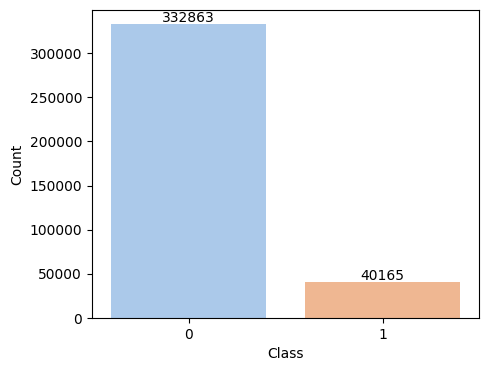

In [ ]:
# Menghitung jumlah setiap nilai dalam y_train
value_counts_train = y_train.value_counts()

# Membuat grafik menggunakan Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x=value_counts_train.index, y=value_counts_train.values, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')

# Menambahkan jumlah nilai setiap kelas pada grafik
for i in range(len(value_counts_train)):
    plt.text(i, value_counts_train[i], str(value_counts_train[i]), ha='center', va='bottom')

### Oversampling SMOTE Data Train

In [ ]:
# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<ipython-input-75-1b348af7fcc7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_train_res.index, y=value_counts_train_res.values, palette='pastel')


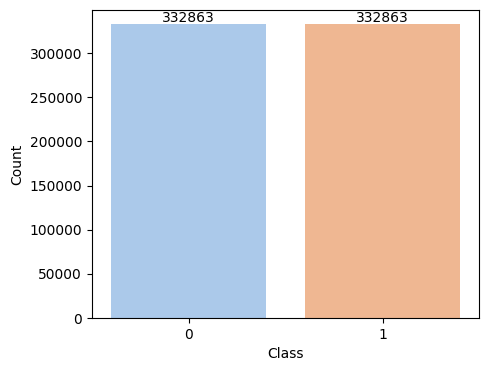

In [ ]:
# Menghitung jumlah setiap nilai dalam y_train_resampled
value_counts_train_res = y_train_resampled.value_counts()

# Membuat grafik menggunakan Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x=value_counts_train_res.index, y=value_counts_train_res.values, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')

# Menambahkan jumlah nilai setiap kelas pada grafik
for i in range(len(value_counts_train_res)):
    plt.text(i, value_counts_train_res[i], str(value_counts_train_res[i]), ha='center', va='bottom')

### Random Forest

#### Training Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
arr_feature_importances_rfc = rfc.feature_importances_
arr_feature_names_rfc = X_train.columns.values

df_feature_importance_rfc = pd.DataFrame(index=range(len(arr_feature_importances_rfc)), columns=['feature', 'importance'])
df_feature_importance_rfc['feature'] = arr_feature_names_rfc
df_feature_importance_rfc['importance'] = arr_feature_importances_rfc
df_all_features_rfc = df_feature_importance_rfc.sort_values(by='importance', ascending=False)
df_all_features_rfc

,feature,importance
90,recoveries,4.891342e-01
88,out_prncp,1.954766e-01
89,total_rec_late_fee,8.984770e-02
77,int_rate,6.131806e-02
98,mths_since_issue_d,2.578844e-02
4,grade_F,2.073002e-02
3,grade_E,1.675435e-02
96,term_int,1.523333e-02
2,grade_D,1.135770e-02
94,tot_cur_bal,1.051636e-02


#### Validation Random Forest

Metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS (kolmogorov-Smirnov)

In [ ]:
y_pred_proba_rfc = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted_rfc = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_rfc, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_rfc.index = y_test.index

##### AUC

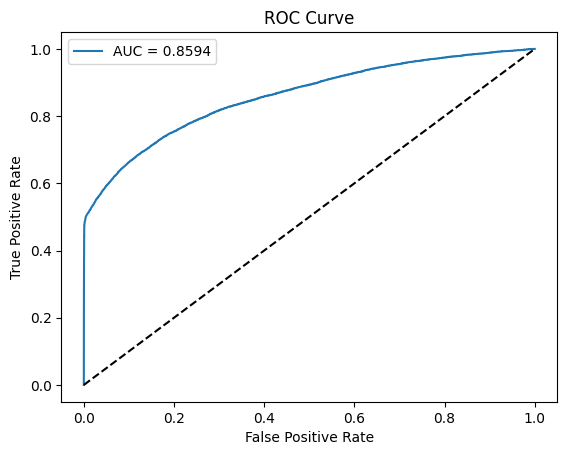

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted_rfc['y_actual'], df_actual_predicted_rfc['y_pred_proba'])
auc_rfc = roc_auc_score(df_actual_predicted_rfc['y_actual'], df_actual_predicted_rfc['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc_rfc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##### KS

In [ ]:
df_actual_predicted_rfc = df_actual_predicted_rfc.sort_values('y_pred_proba')
df_actual_predicted_rfc = df_actual_predicted_rfc.reset_index()

df_actual_predicted_rfc['Cumulative N Population'] = df_actual_predicted_rfc.index + 1
df_actual_predicted_rfc['Cumulative N Bad'] = df_actual_predicted_rfc['y_actual'].cumsum()
df_actual_predicted_rfc['Cumulative N Good'] = df_actual_predicted_rfc['Cumulative N Population'] - df_actual_predicted_rfc['Cumulative N Bad']
df_actual_predicted_rfc['Cumulative Perc Population'] = df_actual_predicted_rfc['Cumulative N Population'] / df_actual_predicted_rfc.shape[0]
df_actual_predicted_rfc['Cumulative Perc Bad'] = df_actual_predicted_rfc['Cumulative N Bad'] / df_actual_predicted_rfc['y_actual'].sum()
df_actual_predicted_rfc['Cumulative Perc Good'] = df_actual_predicted_rfc['Cumulative N Good'] / (df_actual_predicted_rfc.shape[0] - df_actual_predicted_rfc['y_actual'].sum())

In [ ]:
df_actual_predicted_rfc.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,320223,0,0.044706,1,0,1,0.000011,0.0,0.000012
1,321938,0,0.044732,2,0,2,0.000021,0.0,0.000024
2,318621,0,0.044745,3,0,3,0.000032,0.0,0.000036
3,352638,0,0.044745,4,0,4,0.000043,0.0,0.000048
4,334474,0,0.044823,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5647')

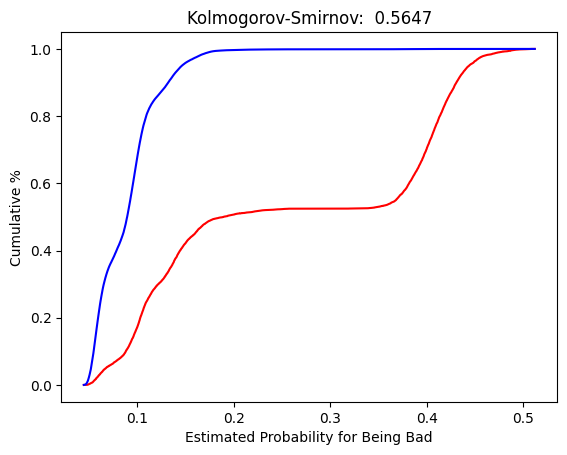

In [ ]:
KS_rfc = max(df_actual_predicted_rfc['Cumulative Perc Good'] - df_actual_predicted_rfc['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_rfc['y_pred_proba'], df_actual_predicted_rfc['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_rfc['y_pred_proba'], df_actual_predicted_rfc['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS_rfc)

### Boosting

#### Training Gboost

In [ ]:
# Inisialisasi model Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Latih model pada data latih
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Mendapatkan nilai penting fitur
arr_feature_importances_gb = gb_clf.feature_importances_
arr_feature_names_gb = X_train.columns.values

# Membuat DataFrame untuk menyimpan nilai penting fitur
df_feature_importance_gb = pd.DataFrame(index=range(len(arr_feature_importances_gb)), columns=['feature', 'importance'])
df_feature_importance_gb['feature'] = arr_feature_names_gb
df_feature_importance_gb['importance'] = arr_feature_importances_gb
df_all_features_gb = df_feature_importance_gb.sort_values(by='importance', ascending=False)
print(df_all_features_gb)

                                feature  importance
90                           recoveries    0.875979
88                            out_prncp    0.033400
89                   total_rec_late_fee    0.025065
98                   mths_since_issue_d    0.023701
77                             int_rate    0.018123
81                       inq_last_6mths    0.009809
78                           annual_inc    0.004224
79                                  dti    0.003050
76                            loan_amnt    0.001231
96                             term_int    0.001103
75                initial_list_status_w    0.001068
97          mths_since_earliest_cr_line    0.000703
95                       emp_length_int    0.000613
94                          tot_cur_bal    0.000446
10                  home_ownership_RENT    0.000334
85                            revol_bal    0.000261
83                             open_acc    0.000207
86                           revol_util    0.000171
58          

#### Validation Gboost

In [ ]:
y_pred_proba_gb = gb_clf.predict_proba(X_test)[:][:,1]

df_actual_predicted_gb = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_gb, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_gb.index = y_test.index

##### AUC

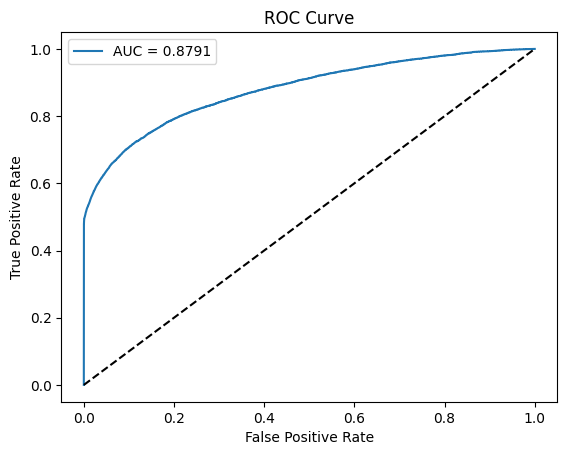

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted_gb['y_actual'], df_actual_predicted_gb['y_pred_proba'])
auc_gb = roc_auc_score(df_actual_predicted_gb['y_actual'], df_actual_predicted_gb['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc_gb)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##### KS

In [ ]:
df_actual_predicted_gb = df_actual_predicted_gb.sort_values('y_pred_proba')
df_actual_predicted_gb = df_actual_predicted_gb.reset_index()

df_actual_predicted_gb['Cumulative N Population'] = df_actual_predicted_gb.index + 1
df_actual_predicted_gb['Cumulative N Bad'] = df_actual_predicted_gb['y_actual'].cumsum()
df_actual_predicted_gb['Cumulative N Good'] = df_actual_predicted_gb['Cumulative N Population'] - df_actual_predicted_gb['Cumulative N Bad']
df_actual_predicted_gb['Cumulative Perc Population'] = df_actual_predicted_gb['Cumulative N Population'] / df_actual_predicted_gb.shape[0]
df_actual_predicted_gb['Cumulative Perc Bad'] = df_actual_predicted_gb['Cumulative N Bad'] / df_actual_predicted_gb['y_actual'].sum()
df_actual_predicted_gb['Cumulative Perc Good'] = df_actual_predicted_gb['Cumulative N Good'] / (df_actual_predicted_gb.shape[0] - df_actual_predicted_gb['y_actual'].sum())

In [ ]:
df_actual_predicted_gb.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,42359,0,0.002138,1,0,1,0.000011,0.0,0.000012
1,167592,0,0.007571,2,0,2,0.000021,0.0,0.000024
2,105278,0,0.007668,3,0,3,0.000032,0.0,0.000036
3,139693,0,0.007772,4,0,4,0.000043,0.0,0.000048
4,126857,0,0.007857,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6086')

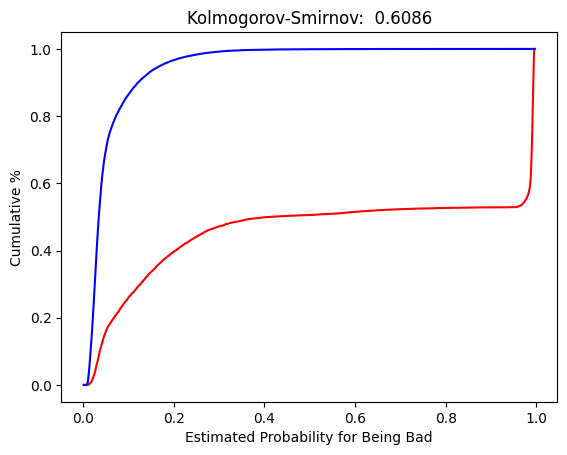

In [ ]:
KS_gb = max(df_actual_predicted_gb['Cumulative Perc Good'] - df_actual_predicted_gb['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_gb['y_pred_proba'], df_actual_predicted_gb['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_gb['y_pred_proba'], df_actual_predicted_gb['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS_gb)

#### Overfitting Check

In [ ]:
# # Evaluasi performa model pada data uji
# accuracy_test = gb_clf.score(X_test, y_test)
# print("Akurasi pada data uji:", accuracy_test)

# # Perbandingan performa pada data latih dan data uji
# accuracy_train = gb_clf.score(X_train, y_train)
# print("Akurasi pada data latih:", accuracy_train)

# # Analisis kurva pembelajaran
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(gb_clf, X_train, y_train, cv=5)

# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
# plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
# plt.xlabel('Training examples')
# plt.ylabel('Score')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

# # Analisis kurva validasi silang
# from sklearn.model_selection import validation_curve

# param_range = [3, 4, 5, 6, 7] # Contoh range untuk hyperparameter yang ingin diselidiki, misalnya max_depth

# train_scores, test_scores = validation_curve(
#     gb_clf, X_train, y_train, param_name="max_depth", param_range=param_range,
#     cv=5, scoring="accuracy", n_jobs=1)

# plt.figure(figsize=(10, 6))
# plt.plot(param_range, np.mean(train_scores, axis=1), label='Train')
# plt.plot(param_range, np.mean(test_scores, axis=1), label='Test')
# plt.xlabel('Max Depth')
# plt.ylabel('Score')
# plt.title('Validation Curve')
# plt.legend()
# plt.show()


### Logistic Regression

#### Training LR

In [ ]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Melatih model pada data latih
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#### Validation LR

In [ ]:
y_pred_proba_lr = lr_model.predict_proba(X_test)[:][:,1]

df_actual_predicted_lr = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_lr, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_lr.index = y_test.index

##### AUC

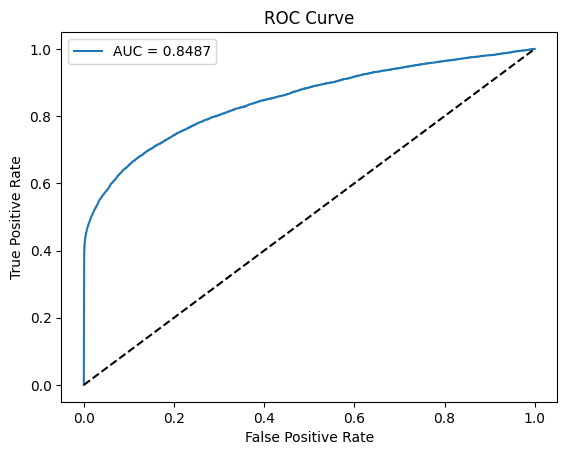

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba'])
auc_lr = roc_auc_score(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc_lr)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##### KS

In [ ]:
df_actual_predicted_lr = df_actual_predicted_lr.sort_values('y_pred_proba')
df_actual_predicted_lr = df_actual_predicted_lr.reset_index()

df_actual_predicted_lr['Cumulative N Population'] = df_actual_predicted_lr.index + 1
df_actual_predicted_lr['Cumulative N Bad'] = df_actual_predicted_lr['y_actual'].cumsum()
df_actual_predicted_lr['Cumulative N Good'] = df_actual_predicted_lr['Cumulative N Population'] - df_actual_predicted_lr['Cumulative N Bad']
df_actual_predicted_lr['Cumulative Perc Population'] = df_actual_predicted_lr['Cumulative N Population'] / df_actual_predicted_lr.shape[0]
df_actual_predicted_lr['Cumulative Perc Bad'] = df_actual_predicted_lr['Cumulative N Bad'] / df_actual_predicted_lr['y_actual'].sum()
df_actual_predicted_lr['Cumulative Perc Good'] = df_actual_predicted_lr['Cumulative N Good'] / (df_actual_predicted_lr.shape[0] - df_actual_predicted_lr['y_actual'].sum())

In [ ]:
df_actual_predicted_lr.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,451987,0,5.756060e-21,1,0,1,0.000011,0.0,0.000012
1,325185,0,7.727534e-21,2,0,2,0.000021,0.0,0.000024
2,257464,0,1.040399e-06,3,0,3,0.000032,0.0,0.000036
3,304690,0,4.846723e-06,4,0,4,0.000043,0.0,0.000048
4,259676,0,1.074522e-05,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5568')

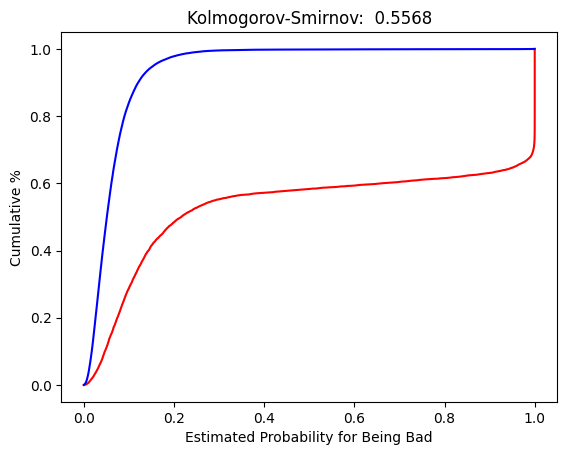

In [ ]:
KS_lr = max(df_actual_predicted_lr['Cumulative Perc Good'] - df_actual_predicted_lr['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_lr['y_pred_proba'], df_actual_predicted_lr['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_lr['y_pred_proba'], df_actual_predicted_lr['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS_lr)

##**KESIMPULAN**

**Random Forest**


*   AUC = 0.859
*   KS = 0.56

**GBoost**


*   AUC = 0.879
*   KS = 0.61

**Logistic Regression**


*   AUC = 0.849
*   KS = 0.56







Dari 3 algoritma tersebut, algoritma Gboost memiliki nilai AUC dan KS lebih tinggi daripada RF dan LR dengan `AUC 0.879` dan `KS 0.61`

Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.